In [1]:
# Needed to see animation if using jupyter notebook
%matplotlib notebook


Running integrated_simulation.py with BODY + FLUID + HORIZONTAL FLUID COLLISION


<IPython.core.display.Javascript object>


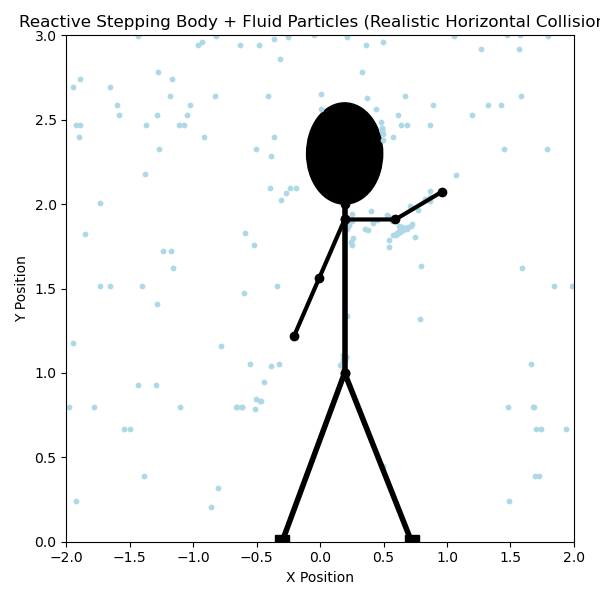

In [2]:
# Needed to see animation in notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import sys
import os

# Add module path
sys.path.append(os.path.abspath("../src/physics"))

from integrated_simulation import simulate_reactive_stepping_body

# Run the simulation
results = simulate_reactive_stepping_body()
(time, torso_x, torso_y, foot_positions, com_positions, step_events,
 left_arm_joints, right_arm_joints, x_particles_trajectory, y_particles_trajectory) = results


fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(0, 3)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Reactive Stepping Body + Fluid Particles (Realistic Horizontal Collisions)")

# Body elements
torso_line, = ax.plot([], [], 'o-', lw=4, color='black')
leg_line, = ax.plot([], [], 'o-', lw=4, color='black')
left_arm_line, = ax.plot([], [], 'o-', lw=3, color='black')
right_arm_line, = ax.plot([], [], 'o-', lw=3, color='black')
head_circle = plt.Circle((0, 0), 0.3, color='black')
ax.add_patch(head_circle)
left_foot_marker, = ax.plot([], [], 's', color='black', markersize=10)
right_foot_marker, = ax.plot([], [], 's', color='black', markersize=10)

# Fluid particles
scat = ax.scatter([], [], color='lightblue', s=10)

def init():
    torso_line.set_data([], [])
    leg_line.set_data([], [])
    left_arm_line.set_data([], [])
    right_arm_line.set_data([], [])
    left_foot_marker.set_data([], [])
    right_foot_marker.set_data([], [])
    head_circle.center = (0, 0)
    scat.set_offsets(np.empty((0, 2)))
    return (torso_line, leg_line, left_arm_line, right_arm_line,
            left_foot_marker, right_foot_marker, head_circle, scat)

def update(frame):
    lf_x, rf_x = foot_positions[frame]
    foot_y = 0
    com_x = com_positions[frame]
    tx = torso_x[frame]
    ty = torso_y[frame]

    knee_x = com_x
    knee_y = 1.0
    leg_x = [lf_x, knee_x, rf_x]
    leg_y = [foot_y, knee_y, foot_y]

    left_arm = left_arm_joints[frame]
    right_arm = right_arm_joints[frame]
    left_arm_x, left_arm_y = zip(*left_arm)
    right_arm_x, right_arm_y = zip(*right_arm)

    x_shoulder = tx
    y_shoulder = ty - 0.2
    x_head = x_shoulder
    y_head = y_shoulder + 0.3 + 0.2
    head_circle.center = (x_head, y_head)

    x_particles = x_particles_trajectory[frame]
    y_particles = y_particles_trajectory[frame]
    scat.set_offsets(np.c_[x_particles, y_particles])

    torso_line.set_data([com_x, tx], [foot_y + 1, ty])
    leg_line.set_data(leg_x, leg_y)
    left_arm_line.set_data(left_arm_x, left_arm_y)
    right_arm_line.set_data(right_arm_x, right_arm_y)
    left_foot_marker.set_data(lf_x, foot_y)
    right_foot_marker.set_data(rf_x, foot_y)

    return (torso_line, leg_line, left_arm_line, right_arm_line,
            left_foot_marker, right_foot_marker, head_circle, scat)

ani = animation.FuncAnimation(
    fig, update, frames=len(time), init_func=init, blit=True, interval=20)

# Uncomment to export as mp4:
ani.save("latest.mp4", writer="ffmpeg", fps=60)

plt.tight_layout()
plt.show()
